In [ ]:
 #挂载云盘 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#进入项目目录
print('original document')
!ls
import os
os.chdir('/content/drive/My Drive/colab/2020年C题')
print('current document')
!ls

original document
 2020年C题--面向康复工程的脑电信号分析和判别模型.docx
'~$20年C题--面向康复工程的脑电信号分析和判别模型.docx'
 C-1-加叠加.ipynb
 c2_2.xlsx
 C-4.ipynb
 data.rar
 lstm-classification
 Multi-Class-Classification
 unrar.ipynb
 VAE-TensorFlow-master
 附件1-P300脑机接口数据
 附件2-睡眠脑电数据.xlsx
current document
 2020年C题--面向康复工程的脑电信号分析和判别模型.docx
'~$20年C题--面向康复工程的脑电信号分析和判别模型.docx'
 C-1-加叠加.ipynb
 c2_2.xlsx
 C-4.ipynb
 data.rar
 lstm-classification
 Multi-Class-Classification
 unrar.ipynb
 VAE-TensorFlow-master
 附件1-P300脑机接口数据
 附件2-睡眠脑电数据.xlsx


In [ ]:
#设置参数
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data_path='附件2-睡眠脑电数据.xlsx'
window_len=50
sample_num=20
test_size = 0.1

In [ ]:
def data_preprocessing(data_cut):
  data_cut=(data_cut-data_cut.min())/(data_cut.max()-data_cut.min())
  return data_cut.mean(axis=0)
def sample_data(data,window_len,sample_num):
  sample_set=range(len(data)-window_len)
  random_indices = np.random.choice(sample_set, sample_num, replace = False)
  inst_label=data.iloc[0,0]
  data=data.iloc[:,1:5]
  data=data.values
  feature_collection=[]
  label_collection=[]
  for i in random_indices:
    inst_feature=data_preprocessing(data[i:i+window_len,:])
    feature_collection.append(inst_feature)
    label_collection.append(inst_label)
  return np.array(feature_collection),np.array(label_collection)
def sample_data_sum(data_path,window_len,sample_num):
  feature=[]
  label=[]
  data=pd.read_excel(data_path,0,header=0) 
  feature,label=sample_data(data,window_len,sample_num)
  for i in range(5)[1:]:
    data=pd.read_excel(data_path,i,header=0) 
    feature_collection,label_collection=sample_data(data,window_len,sample_num)
    feature=np.vstack((feature,feature_collection))
    label=np.vstack((label,label_collection))
  label=np.reshape(label, (label.shape[0]*label.shape[1]))
  print(feature.shape,label.shape)
  return feature,label

(100, 4) (100,)


(100, 4) (100,)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(100, 4) (100,)
(100, 4) (100,)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(100, 4) (100,)
(100, 4) (100,)
(100, 4) (100,)
(100, 4) (100,)
(100, 4) (100,)
(100, 4) (100,)


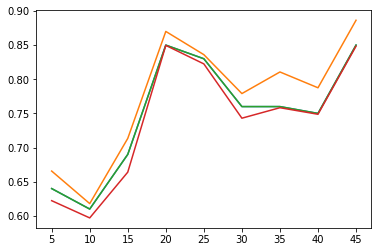

In [ ]:
window_len=50
sample_num=20
cv=5
from sklearn.model_selection import cross_val_score
#随机森林方法
from sklearn.ensemble import RandomForestClassifier
def val_result(model,X,Y,cv):
  accuracy=cross_val_score(model, X, Y, cv=cv,scoring='accuracy').mean()
  precision_weighted=cross_val_score(model, X, Y, cv=cv,scoring='precision_weighted').mean()
  recall_weighted=cross_val_score(model, X, Y, cv=cv,scoring='recall_weighted').mean()
  f1_weighted=cross_val_score(model, X, Y, cv=cv,scoring='f1_weighted').mean()
  return accuracy,precision_weighted,recall_weighted,f1_weighted
accuracy_=[]
precision_weighted_=[]
recall_weighted_=[]
f1_weighted_=[]
for window_len in range(5,50,5):
  feature,label=sample_data_sum(data_path,window_len,sample_num)
  X,Y=feature,label
  model = RandomForestClassifier(max_depth=2, random_state=0)
  accuracy,precision_weighted,recall_weighted,f1_weighted=val_result(model,X,Y,5)
  accuracy_.append(accuracy)
  precision_weighted_.append(precision_weighted)
  recall_weighted_.append(recall_weighted)
  f1_weighted_.append(f1_weighted)
x_plot=range(5,50,5)
plt.plot(x_plot,accuracy_)
plt.plot(x_plot,precision_weighted_)
plt.plot(x_plot,recall_weighted_)
plt.plot(x_plot,f1_weighted_)
plt.show()

(50, 4) (50,)
(100, 4) (100,)
(150, 4) (150,)
(200, 4) (200,)
(250, 4) (250,)
(300, 4) (300,)
(350, 4) (350,)
(400, 4) (400,)
(450, 4) (450,)


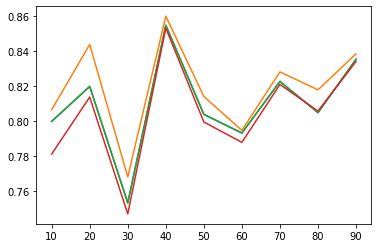

In [ ]:
window_len=50
sample_num=20
cv=5
from sklearn.model_selection import cross_val_score
#随机森林方法

def val_result(model,X,Y,cv):
  accuracy=cross_val_score(model, X, Y, cv=cv,scoring='accuracy').mean()
  precision_weighted=cross_val_score(model, X, Y, cv=cv,scoring='precision_weighted').mean()
  recall_weighted=cross_val_score(model, X, Y, cv=cv,scoring='recall_weighted').mean()
  f1_weighted=cross_val_score(model, X, Y, cv=cv,scoring='f1_weighted').mean()
  return accuracy,precision_weighted,recall_weighted,f1_weighted
accuracy_=[]
precision_weighted_=[]
recall_weighted_=[]
f1_weighted_=[]
for sample_num in range(10,100,10):
  feature,label=sample_data_sum(data_path,window_len,sample_num)
  X,Y=feature,label
  accuracy,precision_weighted,recall_weighted,f1_weighted=val_result(model,X,Y,5)
  accuracy_.append(accuracy)
  precision_weighted_.append(precision_weighted)
  recall_weighted_.append(recall_weighted)
  f1_weighted_.append(f1_weighted)
x_plot=range(10,100,10)
plt.plot(x_plot,accuracy_)
plt.plot(x_plot,precision_weighted_)
plt.plot(x_plot,recall_weighted_)
plt.plot(x_plot,f1_weighted_)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

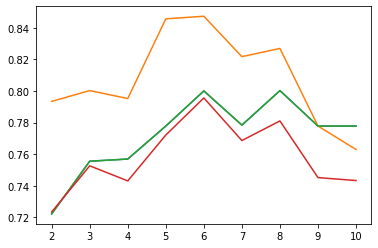

In [ ]:
window_len=50
sample_num=20
test_size = 0.1
from sklearn.model_selection import cross_val_score
#knn k近邻分类算法
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
def val_result(model,X,Y,cv):
  accuracy=cross_val_score(model, X, Y, cv=cv,scoring='accuracy').mean()
  precision_weighted=cross_val_score(model, X, Y, cv=cv,scoring='precision_weighted').mean()
  recall_weighted=cross_val_score(model, X, Y, cv=cv,scoring='recall_weighted').mean()
  f1_weighted=cross_val_score(model, X, Y, cv=cv,scoring='f1_weighted').mean()
  return accuracy,precision_weighted,recall_weighted,f1_weighted
accuracy_=[]
precision_weighted_=[]
recall_weighted_=[]
f1_weighted_=[]
for cv in range(2,11):
  accuracy,precision_weighted,recall_weighted,f1_weighted=val_result(model,X,Y,cv)
  accuracy_.append(accuracy)
  precision_weighted_.append(precision_weighted)
  recall_weighted_.append(recall_weighted)
  f1_weighted_.append(f1_weighted)
x_plot=range(2,11)
plt.plot(x_plot,accuracy_)
plt.plot(x_plot,precision_weighted_)
plt.plot(x_plot,recall_weighted_)
plt.plot(x_plot,f1_weighted_)
plt.show()


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

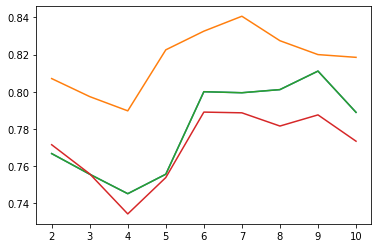

In [ ]:
window_len=50
sample_num=20
test_size = 0.1
from sklearn.model_selection import cross_val_score
# 支持向量机SVM
from sklearn.svm import SVC  
model = SVC(kernel='rbf') 
def val_result(model,X,Y,cv):
  accuracy=cross_val_score(model, X, Y, cv=cv,scoring='accuracy').mean()
  precision_weighted=cross_val_score(model, X, Y, cv=cv,scoring='precision_weighted').mean()
  recall_weighted=cross_val_score(model, X, Y, cv=cv,scoring='recall_weighted').mean()
  f1_weighted=cross_val_score(model, X, Y, cv=cv,scoring='f1_weighted').mean()
  return accuracy,precision_weighted,recall_weighted,f1_weighted
accuracy_=[]
precision_weighted_=[]
recall_weighted_=[]
f1_weighted_=[]
for cv in range(2,11):
  accuracy,precision_weighted,recall_weighted,f1_weighted=val_result(model,X,Y,cv)
  accuracy_.append(accuracy)
  precision_weighted_.append(precision_weighted)
  recall_weighted_.append(recall_weighted)
  f1_weighted_.append(f1_weighted)
x_plot=range(2,11)
plt.plot(x_plot,accuracy_)
plt.plot(x_plot,precision_weighted_)
plt.plot(x_plot,recall_weighted_)
plt.plot(x_plot,f1_weighted_)
plt.show()
